# MODULO 3

## Carga de librerias comprobacion de versiones

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Numpy: {np.__version__}")

Pandas: 2.2.3
Seaborn: 0.13.2
Numpy: 2.2.0


# PARTE 1: CARGA Y LIMPIEZA

## Carga del DataFrame

In [3]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Analisis Previo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


## Comprobar si hay valores "?" sustituirlos por NaN y volver a comprobar.

Lo sustituyo por NaN porque luego voy a cambiar los valores NaN por diferentes valores y para no hacer la misma operacion 2 veces

In [5]:
(df=='?').any()

carat      False
cut         True
color       True
clarity    False
depth      False
table      False
price       True
x           True
y          False
z          False
dtype: bool

In [6]:
df.replace('?', np.nan, inplace=True)
(df=='?').any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Ya no hay valores '?' en mi DataFrame

## Cambio de tipo:
 * ### 'price' y 'x' de odject a float64
 * ### object a category

In [7]:
df[['price', 'x']] = df[['price', 'x']].astype(float)
df['carat'] = df['carat'].astype('float32')
for col in df:
    if df[col].dtype == object:
        df[col]=df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float32 
 1   cut      53936 non-null  category
 2   color    53937 non-null  category
 3   clarity  53938 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float64 
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(3), float32(1), float64(6)
memory usage: 2.8 MB


## Comprobar y rellenar Nulos

In [8]:
df.isna().sum()

# Uso el print para comprobar que valores he añadido

for col in df:
    if df[col].dtype == 'category':
        mode = Counter(df[col]).most_common()[0][0]
        df[col]=df[col].fillna(mode)
        print(f"Moda {col} = {mode}")
    else:
        mean = round(df[col].mean(), 2)
        df[col]=df[col].fillna(mean)
        print(f"Media {col} = {mean}")


Media carat = 0.800000011920929
Moda cut = Ideal
Moda color = G
Moda clarity = SI1
Media depth = 61.75
Media table = 57.46
Media price = 3932.54
Media x = 5.73
Media y = 5.73
Media z = 3.54


### Comprobamos que no hay nulos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float32 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  float64 
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float32(1), float64(6)
memory usage: 2.8 MB


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Para poner price como int no puede tener nulos entonces lo pongo ahora

In [11]:
df['price'] = df['price'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float32 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int32   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float32(1), float64(5), int32(1)
memory usage: 2.6 MB


## Discretizacion

El .get_dummies lo hare abajo aqui solo realizare la de cut

### Encoding de la columna cut

In [12]:
df['cut_int']=df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})

cols = df.columns.to_list()
cols.remove('cut_int')
cols.insert(cols.index('cut')+1, 'cut_int')
df=df[cols]

# PARTE 2: TRANSFORMACIONES

* ### price_iva

In [13]:
df['price_iva'] = df['price'] *1.21
cols = df.columns.to_list()
cols.remove('price_iva')
cols.insert(cols.index('price')+1, 'price_iva')
df = df[cols]
df.head()

,carat,cut,cut_int,color,clarity,depth,table,price,price_iva,x,y,z
0,0.23,Ideal,5,E,SI2,61.5,55.0,326,394.46,3.95,3.98,2.43
1,0.21,Premium,4,E,SI1,59.8,61.0,326,394.46,3.89,3.84,2.31
2,0.23,Good,2,E,VS1,56.9,65.0,327,395.67,4.05,4.07,2.31
3,0.29,Premium,4,I,VS2,62.4,58.0,334,404.14,4.20,4.23,2.63
4,0.31,Good,2,J,SI2,63.3,58.0,335,405.35,4.34,4.35,2.75


* ### price_discount

In [14]:
def discount(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.9
    elif row['price'] >= 1000 and row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85
    else:
        return row['price']
    
df['price_discount'] = df.apply(discount, axis=1)
cols = df.columns.to_list()
cols.remove('price_discount')
cols.insert(cols.index('price_iva')+1, 'price_discount')
df = df[cols]
df[df['cut'] == 'Ideal'].head()

,carat,cut,cut_int,color,clarity,depth,table,price,price_iva,price_discount,x,y,z
0,0.23,Ideal,5,E,SI2,61.5,55.0,326,394.46,293.4,3.95,3.98,2.43
11,0.23,Ideal,5,J,VS1,62.8,56.0,340,411.40,306.0,3.93,3.90,2.46
13,0.31,Ideal,5,J,SI2,62.2,54.0,344,416.24,309.6,4.35,4.37,2.71
16,0.30,Ideal,5,I,SI2,62.0,54.0,348,421.08,313.2,4.31,4.34,2.68
39,0.33,Ideal,5,I,SI2,61.8,55.0,403,487.63,362.7,4.49,4.51,2.78


* ### volume

In [15]:

df['volume'] = df[['x','y','z']].apply(
    lambda row : round(row['x']*row['y']*row['z'], 2), axis=1)
df.head()

,carat,cut,cut_int,color,clarity,depth,table,price,price_iva,price_discount,x,y,z,volume
0,0.23,Ideal,5,E,SI2,61.5,55.0,326,394.46,293.4,3.95,3.98,2.43,38.20
1,0.21,Premium,4,E,SI1,59.8,61.0,326,394.46,326.0,3.89,3.84,2.31,34.51
2,0.23,Good,2,E,VS1,56.9,65.0,327,395.67,327.0,4.05,4.07,2.31,38.08
3,0.29,Premium,4,I,VS2,62.4,58.0,334,404.14,334.0,4.20,4.23,2.63,46.72
4,0.31,Good,2,J,SI2,63.3,58.0,335,405.35,335.0,4.34,4.35,2.75,51.92


## Ordenar por 2 columnas Cut y Price

In [16]:

df.sort_values(['cut_int', 'price'], ascending=[True, False], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,carat,cut,cut_int,color,clarity,depth,table,price,price_iva,price_discount,x,y,z,volume
0,2.01,Fair,1,G,SI1,70.6,64.0,18574,22474.54,18574.0,7.43,6.64,4.69,231.38
1,2.02,Fair,1,H,VS2,64.5,57.0,18565,22463.65,18565.0,8.00,7.95,5.14,326.90
2,4.50,Fair,1,J,I1,65.8,58.0,18531,22422.51,18531.0,10.23,10.16,6.72,698.46
3,2.00,Fair,1,G,VS2,67.6,58.0,18515,22403.15,18515.0,7.65,7.61,5.16,300.40
4,2.51,Fair,1,H,SI2,64.7,57.0,18308,22152.68,18308.0,8.44,8.50,5.48,393.14


## Groupby

In [17]:
df.columns

Index(['carat', 'cut', 'cut_int', 'color', 'clarity', 'depth', 'table',
       'price', 'price_iva', 'price_discount', 'x', 'y', 'z', 'volume'],
      dtype='object')

* ### cut

In [18]:
df.groupby('cut')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


C:\Users\p-rom\AppData\Local\Temp\ipykernel_10060\4004846623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
               mean   max   min       mean   max   min       mean   max   min   
cut                                                                             
Fair       1.046137  5.01  0.22  64.041677  79.0  43.0  59.053789  95.0  49.0   
Good       0.849185  3.01  0.23  62.365879  67.0  54.3  58.694639  66.0  51.0   
Ideal      0.702888  3.50  0.20  61.709446  66.7  43.0  55.951951  63.0  43.0   
Premium    0.891981  4.01  0.20  61.264673  63.0  58.0  58.745944  62.0  51.0   
Very Good  0.806307  4.00  0.20  61.818212  64.9  56.8  57.955977  66.0  44.0   

                 price              
                  mean    max  min  
cut                                 
Fair       4358.757764  18574  337  
Good       3929.241337  18788  327  
Ideal      3458.137893  18806  326  
Premium    4584.257704  18823  326  
Very Good  3979.489570  18818  336

* ### color

In [19]:
df.groupby('color')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])

C:\Users\p-rom\AppData\Local\Temp\ipykernel_10060\4011007590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('color')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
           mean   max   min       mean   max   min       mean   max   min   
color                                                                       
D      0.657833  3.40  0.20  61.698110  71.6  52.2  57.404945  73.0  52.0   
E      0.657867  3.05  0.20  61.662090  79.0  51.0  57.491201  73.0  44.0   
F      0.736538  3.01  0.20  61.694582  71.0  52.3  57.433536  95.0  50.0   
G      0.771326  3.01  0.23  61.757137  72.9  43.0  57.288401  76.0  52.0   
H      0.911799  4.13  0.23  61.836850  71.8  52.7  57.517811  73.0  50.0   
I      1.026689  4.01  0.23  61.846357  71.3  50.8  57.577001  70.0  43.0   
J      1.162137  5.01  0.23  61.887215  73.6  43.0  57.812393  68.0  51.6   

             price              
              mean    max  min  
color                           
D      3170.275908  18693  357  
E      3076.752475  18731  326  
F      3723.447914  18791  342  
G      4000.080220  18818  354  
H      4486.891859  18803  337  
I      5089.202361  18823  334  
J      5323.818020  18710  335

* ### clarity

In [20]:
df.groupby('clarity')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])

C:\Users\p-rom\AppData\Local\Temp\ipykernel_10060\3097394055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('clarity')[['carat', 'depth', 'table', 'price']].agg(['mean', 'max', 'min'])


carat                  depth                  table              \
             mean   max   min       mean   max   min       mean   max   min   
clarity                                                                       
I1       1.283846  5.01  0.30  62.734278  78.2  55.6  58.303779  67.0  52.0   
IF       0.505123  2.29  0.23  61.510615  65.6  52.3  56.507207  65.0  52.0   
SI1      0.850533  2.57  0.21  61.853249  72.9  43.0  57.662475  95.0  49.0   
SI2      1.077649  3.04  0.20  61.772167  72.2  53.1  57.927181  79.0  50.1   
VS1      0.727125  2.59  0.23  61.667075  71.8  50.8  57.314945  73.0  43.0   
VS2      0.763914  3.51  0.20  61.724427  79.0  43.0  57.417391  73.0  51.0   
VVS1     0.503321  2.31  0.23  61.624651  67.6  54.0  56.884460  68.0  52.0   
VVS2     0.596202  2.07  0.23  61.663778  67.6  51.0  57.024990  68.0  51.0   

               price              
                mean    max  min  
clarity                           
I1       3924.168691  18531  345  
IF       2864.839106  18806  369  
SI1      3995.232035  18818  326  
SI2      5063.028606  18804  326  
VS1      3839.211873  18795  327  
VS2      3924.828751  18823  334  
VVS1     2523.114637  18777  336  
VVS2     3283.737071  18768  336

# PARTE 3: DISTRIBUCIONES

## Quartiles

In [21]:
price_Q1 = df['price'].quantile(0.25) 
price_Q2 = df['price'].quantile(0.5) 
price_Q3 = df['price'].quantile(0.75) 


## TUKEY


In [22]:
iqr = price_Q3 - price_Q1

# No puede haber elementos menores que el minimo por eso si el lim_min es menor que el minimo valor el lim_min sera el minimo.
lim_min = price_Q1 - 1.5*iqr if price_Q1 - 1.5*iqr > df['price'].min() else df['price'].min()

# No puede haber elementos mayores que el máximo por eso si el lim_maz es mayor que el maximo valor el lim_min sera el maximo.
lim_max = price_Q3 + 1.5*iqr if price_Q3 + 1.5*iqr < df['price'].max() else df['price'].max()

## FILTRO OUTLIERS

In [23]:

filtro = (df['price'] >= lim_min) & (df['price'] <= lim_max)
df_filtered = df[filtro]

La representacion grafica del filtro de outliers esta en la parte EDAS

## ASIMETRIA

In [24]:
print(f'Asimetria = {df['price'].skew()}')
if df['price'].skew() > 0:
    print('La asimetria es mayor que cero tendra cola a la derecha')
elif df['price'].skew() < 0:
    print('La asimetria es menor que cero tendra cola a la izquierda')
else:
    print("Es simetrico")
    

Asimetria = 1.618384826712148
La asimetria es mayor que cero tendra cola a la derecha


## CURTOSIS

In [25]:
print(f'Curtosis = {df['price'].kurtosis()}')
if df['price'].kurtosis() > 0:
    print('La curtosis es mayor que cero tendra colas largas')
elif df['price'].kurtosis() < 0:
    print('La curtosis es menor que cero tendra colas cortas')
else:
    print("Distribucion normal")

Curtosis = 2.1778680332625497
La curtosis es mayor que cero tendra colas largas


## TRANSFORMACION LOG

In [26]:
prices_log = np.log(df['price'])


La grafica la pongo en la parte EDAS

## DISCRETIZACION CON PD.CUT


In [27]:
price_min = df['price'].min()
price_max = df['price'].max()

df['price_category']=pd.cut(
    df['price'],
    bins=[0, price_Q1, price_Q3, price_max],
    labels=['Barato', 'Medio', 'Caro'])

cols = df.columns.to_list()
cols.remove('price_category')
cols.insert(cols.index('price_iva')+1, 'price_category')
df=df[cols]



# PARTE 4 VISUALIZACIONES

## Seaborn EDAS:

### Univariantes

* ### BOXPLOT

<Axes: ylabel='price'>

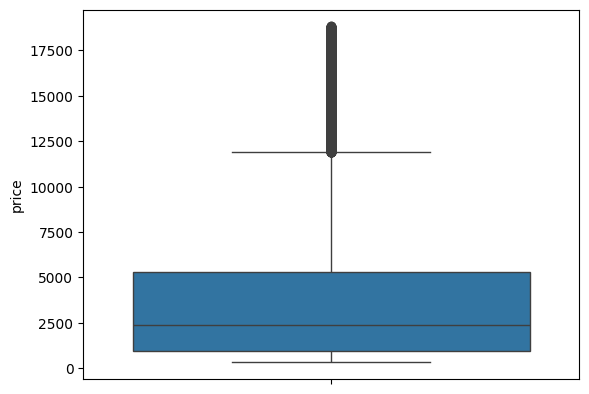

In [28]:
sns.boxplot(df, y='price')

* ### COUNTPLOT

<Axes: xlabel='price_category', ylabel='count'>

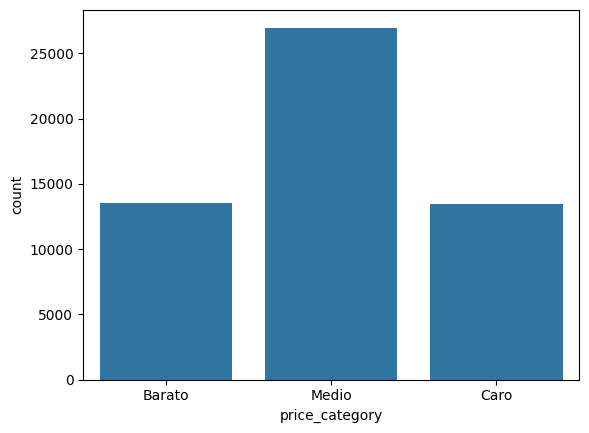

In [29]:
sns.countplot(df, x='price_category')

# Tiene sentido porque he puesto como limites min, q1, q3, max

<Axes: xlabel='cut', ylabel='count'>

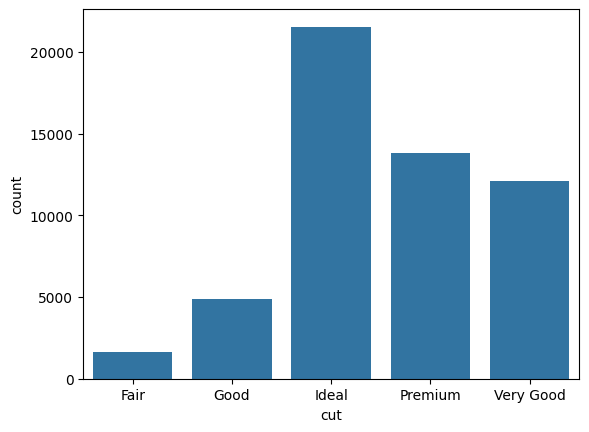

In [30]:
sns.countplot(df, x='cut')

* ### HISTOGRAMA

SIN FILTRAR

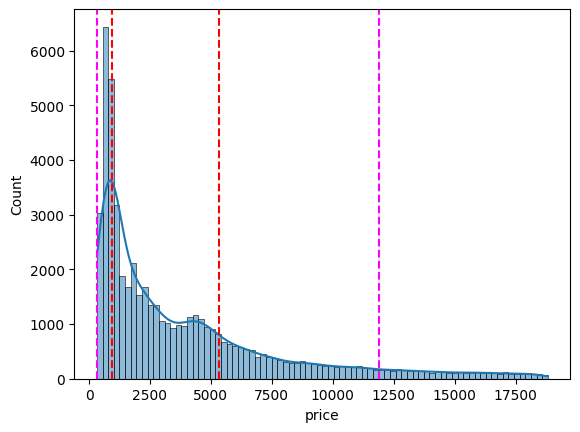

In [31]:
sns.histplot(df, x='price', kde=True)
plt.axvline(x=price_Q1, linestyle='dashed', color='red')
plt.axvline(x=price_Q3, linestyle='dashed', color='red')

plt.axvline(x=lim_min, linestyle='dashed', color='magenta')
plt.axvline(x=lim_max, linestyle='dashed', color='magenta')

SIN OUTLAIERS TUKEY

Vemos que termina en 12000 en lugar de mas de 17500 con outliers


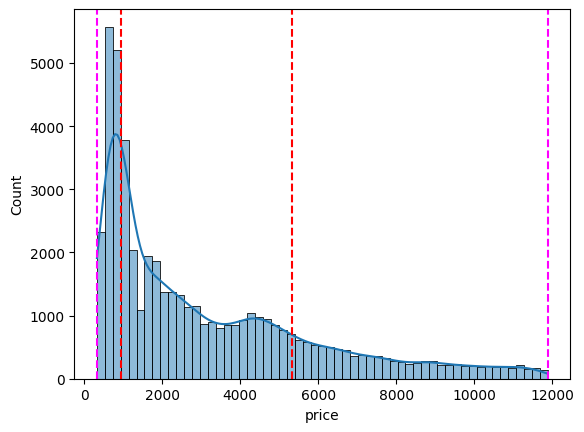

In [32]:
sns.histplot(df_filtered, x='price', kde=True)
plt.axvline(x=price_Q1, linestyle='dashed', color='red')
plt.axvline(x=price_Q3, linestyle='dashed', color='red')

plt.axvline(x=lim_min, linestyle='dashed', color='magenta')
plt.axvline(x=lim_max, linestyle='dashed', color='magenta')

print("Vemos que termina en 12000 en lugar de mas de 17500 con outliers")

GRAFICA TRANSFORMADA LOG


Podemos observar como hemos quitado la cola


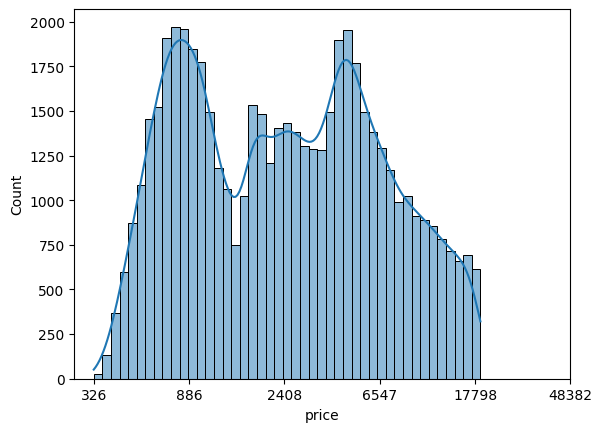

In [33]:
sns.histplot(x=prices_log, kde=True)

log_tick = np.arange(np.min(prices_log), np.max(prices_log)+1)
tick_original = np.exp(log_tick)

plt.xticks(log_tick, [f'{int(tick)}' for tick in tick_original])

print("Podemos observar como hemos quitado la cola")


### Bivariantes y multivariantes

Boxplot

<Axes: xlabel='cut', ylabel='price'>

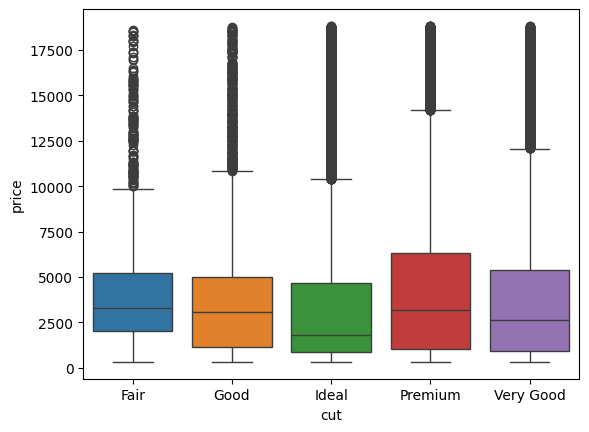

In [34]:
sns.boxplot(df, x='cut', y='price', hue='cut')

Scatterplot

Para un mismo tipo de corte por norma general cuanto mas volumen mas quilates (peso)


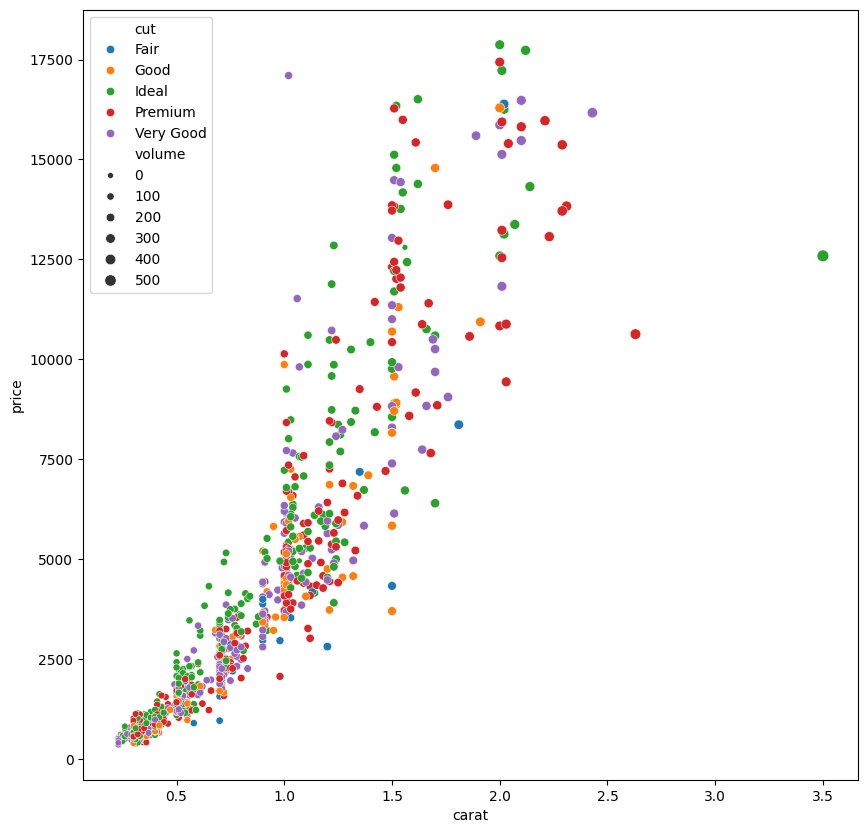

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.sample(1000), x='carat', y='price', hue='cut', size='volume')
print("Para un mismo tipo de corte por norma general cuanto mas volumen mas quilates (peso)")

CORRELACION

<Axes: >

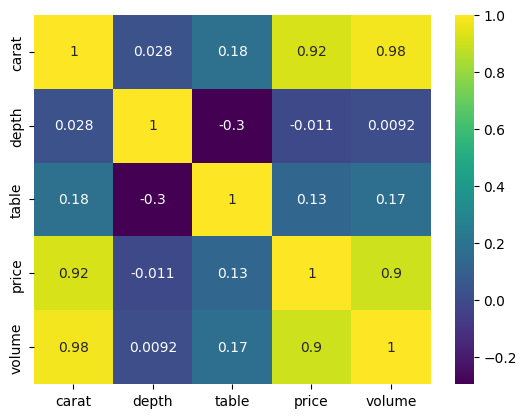

In [36]:
#No tengo en cuenta price_iva porque es igual a price pero multiplicado por una constante
#No tengo en cuenta x, y, z porque volume es un valor dependiente de las 3

df_corr=df[['carat', 'depth', 'table', 'price', 'volume']]
m_corr=df_corr.corr()

sns.heatmap(m_corr, annot=True, cmap='viridis')


In [37]:
df.head()

,carat,cut,cut_int,color,clarity,depth,table,price,price_iva,price_category,price_discount,x,y,z,volume
0,2.01,Fair,1,G,SI1,70.6,64.0,18574,22474.54,Caro,18574.0,7.43,6.64,4.69,231.38
1,2.02,Fair,1,H,VS2,64.5,57.0,18565,22463.65,Caro,18565.0,8.00,7.95,5.14,326.90
2,4.50,Fair,1,J,I1,65.8,58.0,18531,22422.51,Caro,18531.0,10.23,10.16,6.72,698.46
3,2.00,Fair,1,G,VS2,67.6,58.0,18515,22403.15,Caro,18515.0,7.65,7.61,5.16,300.40
4,2.51,Fair,1,H,SI2,64.7,57.0,18308,22152.68,Caro,18308.0,8.44,8.50,5.48,393.14


<Axes: xlabel='None'>

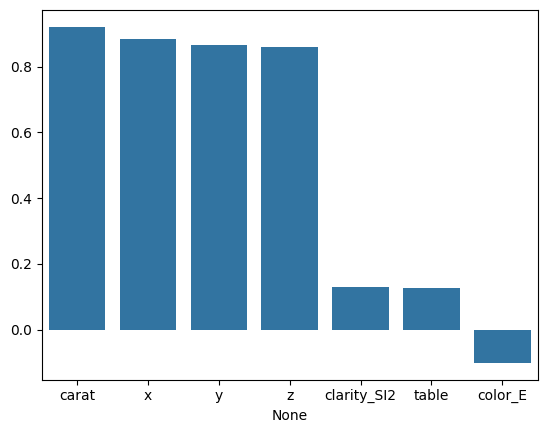

In [38]:
# Elimino price, price_iva, price_discount y las distintas price_category porque son redundantes para compararlas con el precio 
# y en esta ocasion quiero ver que variable del volumen es la que mas influye por eso quito volume
# pero dejo x, y, z

price_correlation=pd.get_dummies(df).corr()['price'].drop(['price','price_iva','volume', 'price_category_Barato', 'price_category_Medio', 'price_category_Caro', 'price_discount'])

#price_correlation
filter = (price_correlation > 0.1) | (price_correlation < -0.1)
filtered_corretation = price_correlation[filter]

filtered_corretation.sort_values(ascending=False, inplace=True)
sns.barplot(x=filtered_corretation.index, y=filtered_corretation.values)

C:\Users\p-rom\AppData\Local\Temp\ipykernel_10060\821756249.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot=pd.pivot_table(df, index='cut', columns='color', values='price', aggfunc='mean')


<Axes: xlabel='color', ylabel='cut'>

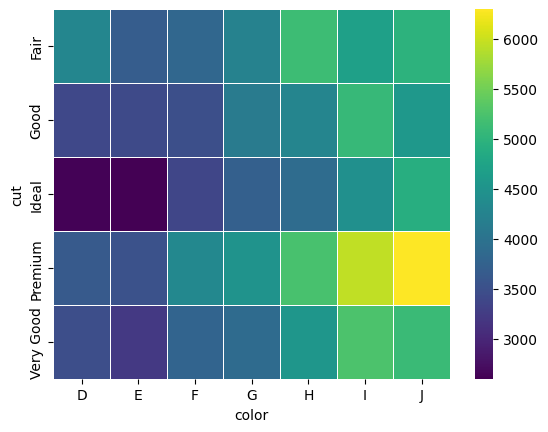

In [39]:
pivot=pd.pivot_table(df, index='cut', columns='color', values='price', aggfunc='mean')
sns.heatmap(pivot, cmap='viridis', linecolor='white', linewidth=0.5)

RELPLOT

Podemos confirmar lo del anterior scatter: que el volumen y el peso (carat) tienen una relacion directa


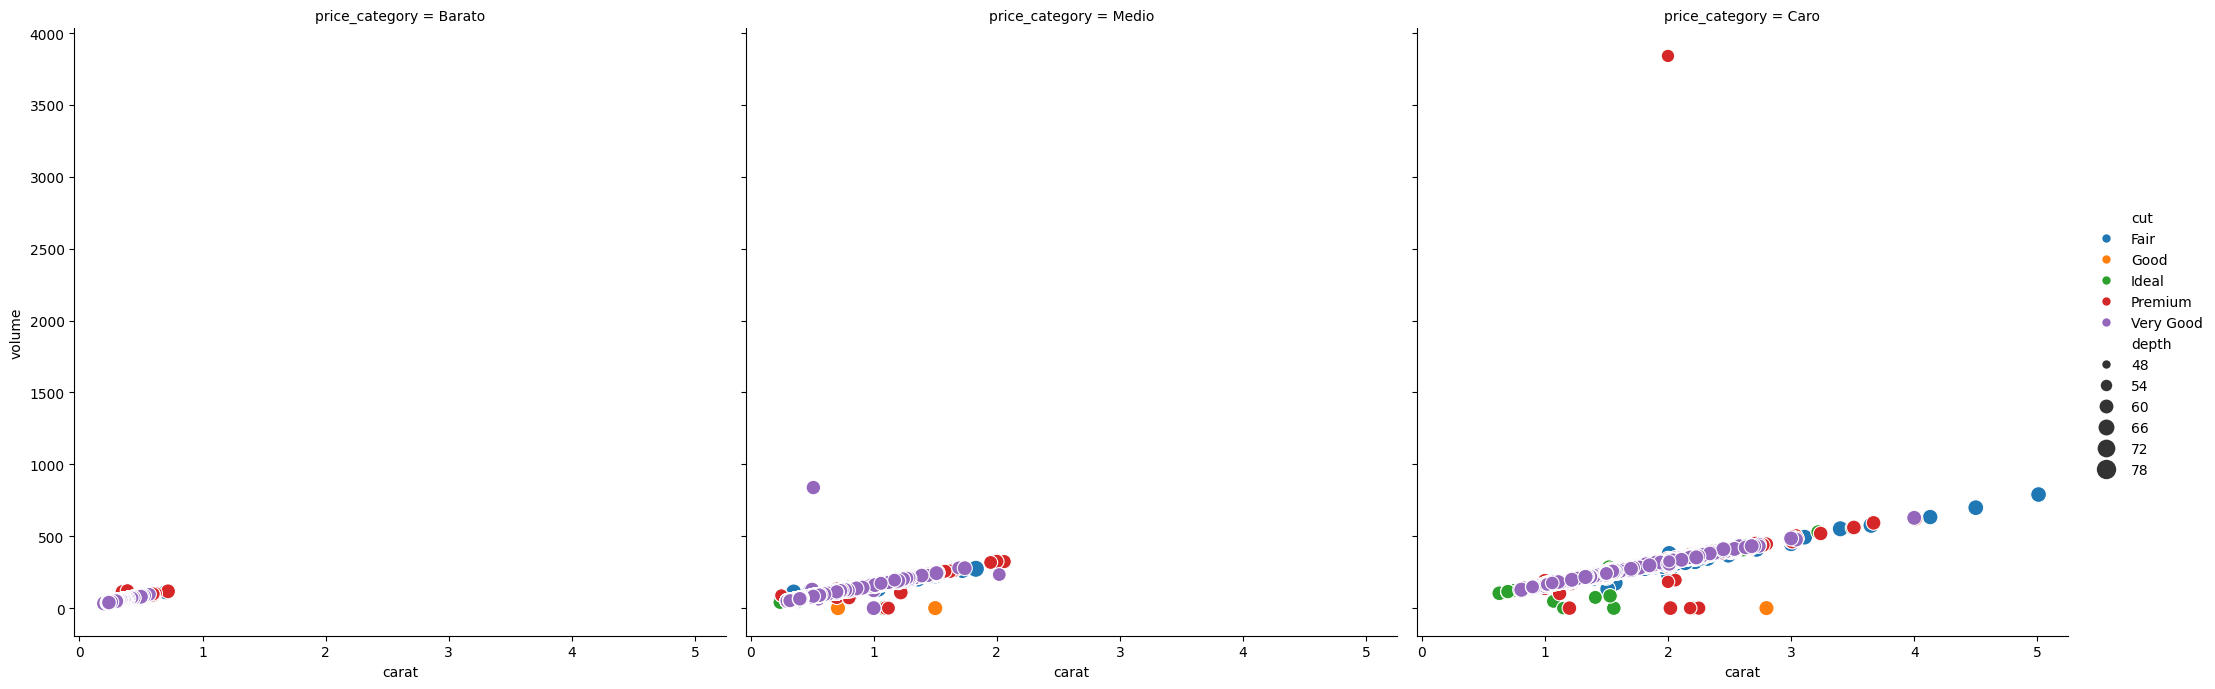

In [40]:
sns.relplot(
    df,
    x='carat',
    y='volume',
    hue='cut',      
    col='price_category',
    size='depth',
    sizes=(10, 200),
    kind='scatter', 
    height=7      
    )

print('Podemos confirmar lo del anterior scatter: que el volumen y el peso (carat) tienen una relacion directa')

Histograma

<Axes: xlabel='price', ylabel='Count'>

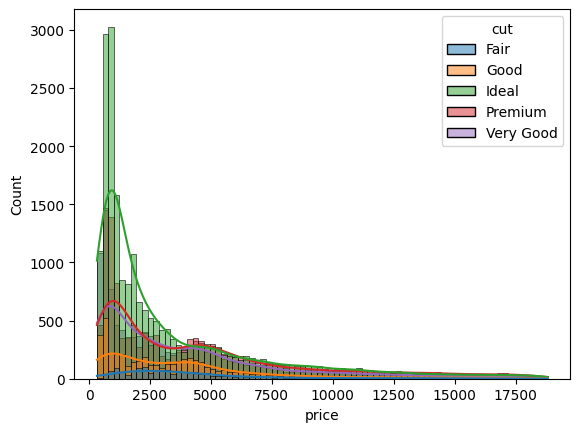

In [41]:
sns.histplot(df, x='price', hue= 'cut', kde=True)


Podemos observar como hemos quitado la cola


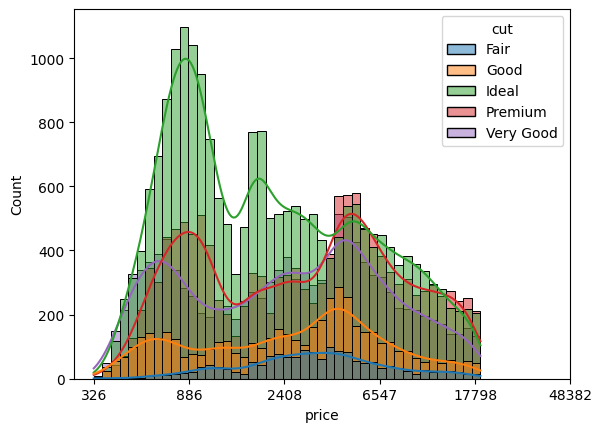

In [42]:
sns.histplot(x=np.log(df['price']), hue=df['cut'], kde=True)

log_tick = np.arange(np.min(prices_log), np.max(prices_log)+1)
tick_original = np.exp(log_tick)

plt.xticks(log_tick, [f'{int(tick)}' for tick in tick_original])

print("Podemos observar como hemos quitado la cola")

## PLOTLY


SCATTER

In [45]:
scatter_plot = px.scatter(
    df.sample(1000),
    x='carat',
    y='price',
    color='cut',
    title='Relación entre Carat y Precio por Tipo de Corte',
    labels={'carat': 'Quilates (Carat)', 'price': 'Precio'},
    template='plotly_dark',
    hover_data=['clarity']
)

scatter_plot.show()

HISTOGRAMA

In [52]:
histogram = px.histogram(
    df,
    x='cut',
    color='price_category',
    title='Distribución de Precios por Tipo de Corte',
    labels={'price': 'Precio'},
    template='plotly_dark'
)

histogram.show()

In [55]:
box_plot = px.box(
    df,
    x='cut',
    y='price',
    color='cut',
    title='Distribución del Precio por Tipo de Corte',
    labels={'cut': 'Tipo de Corte', 'price': 'Precio'},
    template='ggplot2'
)

box_plot.show()